In [ ]:
import configparser

from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

In [ ]:
config = configparser.ConfigParser()
config.read('config.ini')
subscription_id = config.get('Azure', 'subscription_id')
resource_group = config.get('Azure', 'resource_group')
workspace_name = config.get('Azure', 'workspace')
datastore_name = config.get('Azure', 'datastore_name')
clean_data_path = config.get('Azure', 'clean_data_path')
print(subscription_id, resource_group, workspace_name, datastore_name, clean_data_path)

In [1]:

# authenticate
credential = DefaultAzureCredential()
# # Get a handle to the workspace
ml_client = MLClient(
    credential=credential,
    subscription_id=subscription_id,
    resource_group_name=resource_group,
    workspace_name=workspace_name,
)
cpu_cluster = None

In [2]:
from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes

# update the 'my_path' variable to match the location of where you downloaded the data on your
# local filesystem

my_path = "./data/MobileData.csv" # ESTA ES LA DIRECCION D ENUTRO FOLDER ALADO DE NUTROS NOOTEBOOK
# set the version number of the data asset
v1 = "initial"

my_data = Data(
    name="Mobile-Data",
    version=v1,
    description="Mobile Data",
    path=my_path,
    type=AssetTypes.URI_FILE,
)

## create data asset if it doesn't already exist:
try:
    data_asset = ml_client.data.get(name="Mobile-Data", version=v1)
    print(
        f"Data asset already exists. Name: {my_data.name}, version: {my_data.version}"
    )
except:
    ml_client.data.create_or_update(my_data)
    print(f"Data asset created. Name: {my_data.name}, version: {my_data.version}")

Uploading MobileData.csv (< 1 MB): 100%|██████████| 122k/122k [00:00<00:00, 8.31MB/s]




Data asset created. Name: Mobile-Data, version: initial


In [3]:
data_asset = ml_client.data.get(name="Mobile-Data", version="initial")
print(f"Data asset URI: {data_asset.path}")

Data asset URI: azureml://subscriptions/7445df36-7a0b-4835-915a-2215e66fff00/resourcegroups/RESS-Trabajo1/workspaces/WS-Trabajo1/datastores/workspaceblobstore/paths/LocalUpload/3c5b697f059af0af549997b22394012c/MobileData.csv


In [5]:
import pandas as pd
# LA DIRECCION ES LA DEL STORAGE-URI
DataStoreURI = data_asset.path
data= pd.read_csv(DataStoreURI)

# **1.- ANALISIS EXPLORATORIO DE LOS DATOS**

In [6]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## **Distribución de frecuencia**

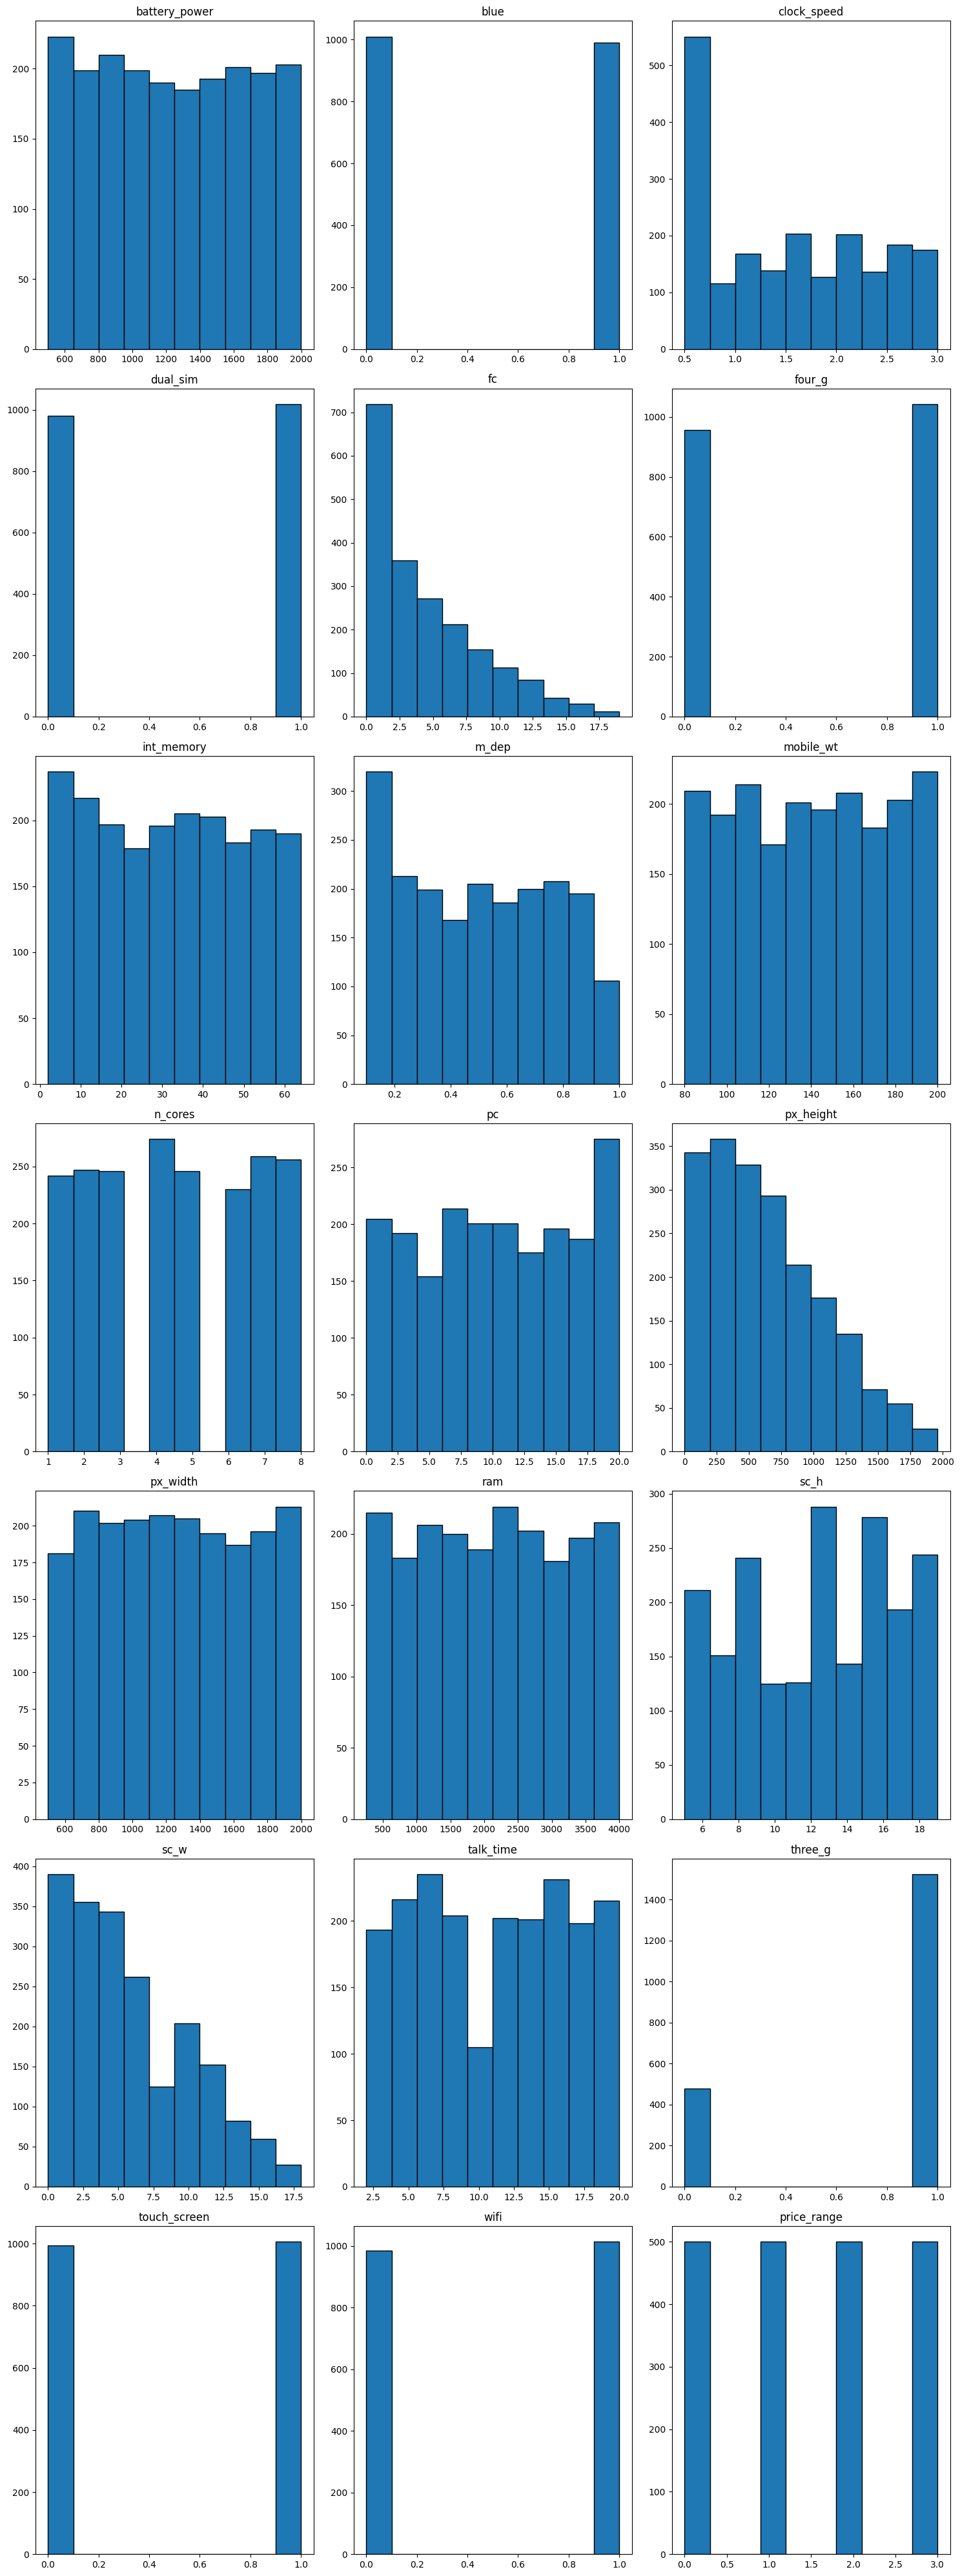

In [9]:

import matplotlib.pyplot as plt

fig, axes = plt.subplots(7, 3, figsize=(15, 40))
axes = axes.ravel() 
for index, column in enumerate(data.columns):
    ax = axes[index]
    ax.hist(data[column], bins=10, edgecolor='k')
    ax.set_title(column)

# Ajusta el diseño y muestra el gráfico
plt.tight_layout()
plt.show()

## **Pruebas de normalidad**

In [10]:
import scipy
scipy.stats.kurtosis(data)
scipy.stats.skew(data)

array([ 0.03187454,  0.020001  ,  0.17795053, -0.03800686,  1.01904639,
       -0.08607962,  0.0578459 ,  0.08901518,  0.00655324,  0.00362479,
        0.01729317,  0.66577145,  0.01477638,  0.00662306, -0.09881006,
        0.63331163,  0.00950463, -1.22722034, -0.01200022, -0.02800274,
        0.        ])

In [11]:
len(data.columns)

21

In [12]:
for column in data.columns:
    shapiro_test = scipy.stats.shapiro(data[column])
    print(f"El test de normalidad de shapiro, de la columna {column} es el siguiente: {shapiro_test}\n")

El test de normalidad de shapiro, de la columna battery_power es el siguiente: ShapiroResult(statistic=0.9518834352493286, pvalue=4.0106132155695427e-25)

El test de normalidad de shapiro, de la columna blue es el siguiente: ShapiroResult(statistic=0.6365631818771362, pvalue=0.0)

El test de normalidad de shapiro, de la columna clock_speed es el siguiente: ShapiroResult(statistic=0.9112281203269958, pvalue=1.136153126294158e-32)

El test de normalidad de shapiro, de la columna dual_sim es el siguiente: ShapiroResult(statistic=0.6364651322364807, pvalue=0.0)

El test de normalidad de shapiro, de la columna fc es el siguiente: ShapiroResult(statistic=0.8737440705299377, pvalue=1.739230333099164e-37)

El test de normalidad de shapiro, de la columna four_g es el siguiente: ShapiroResult(statistic=0.635928750038147, pvalue=0.0)

El test de normalidad de shapiro, de la columna int_memory es el siguiente: ShapiroResult(statistic=0.9527412056922913, pvalue=6.443059407323678e-25)

El test de no

Las pruebas de shapiro nos evidencian que ninguna variable cumple con las normalidda

## **Diagrama caja bigote**

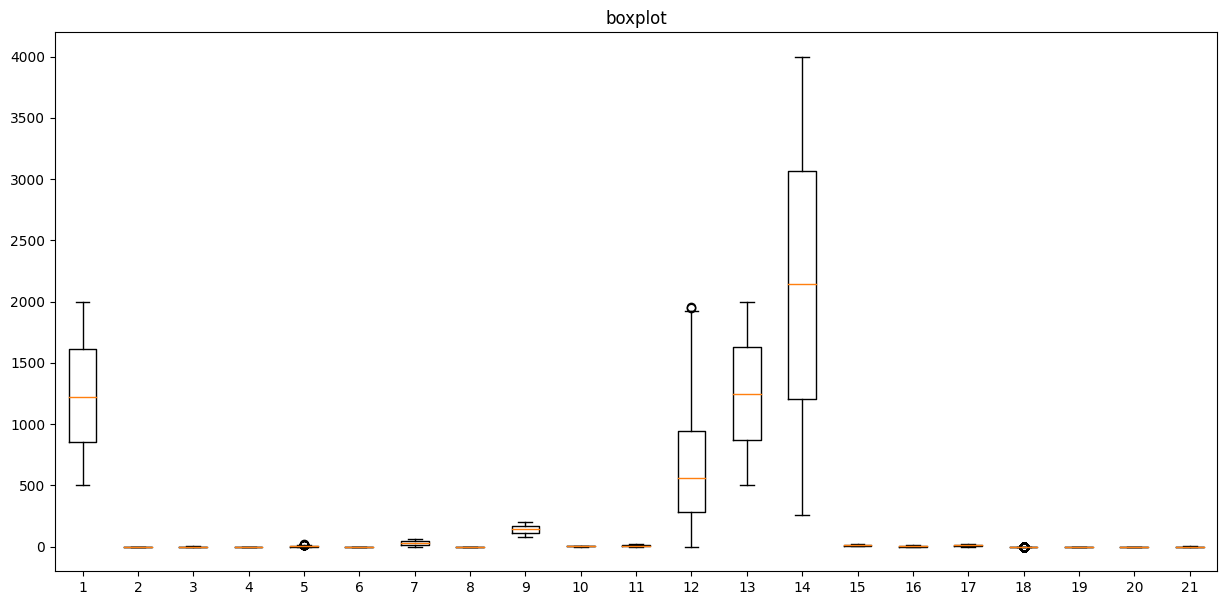

In [13]:
fig, axs = plt.subplots(figsize=(15,7))

axs.boxplot(data)
axs.set_title('boxplot')
plt.show()

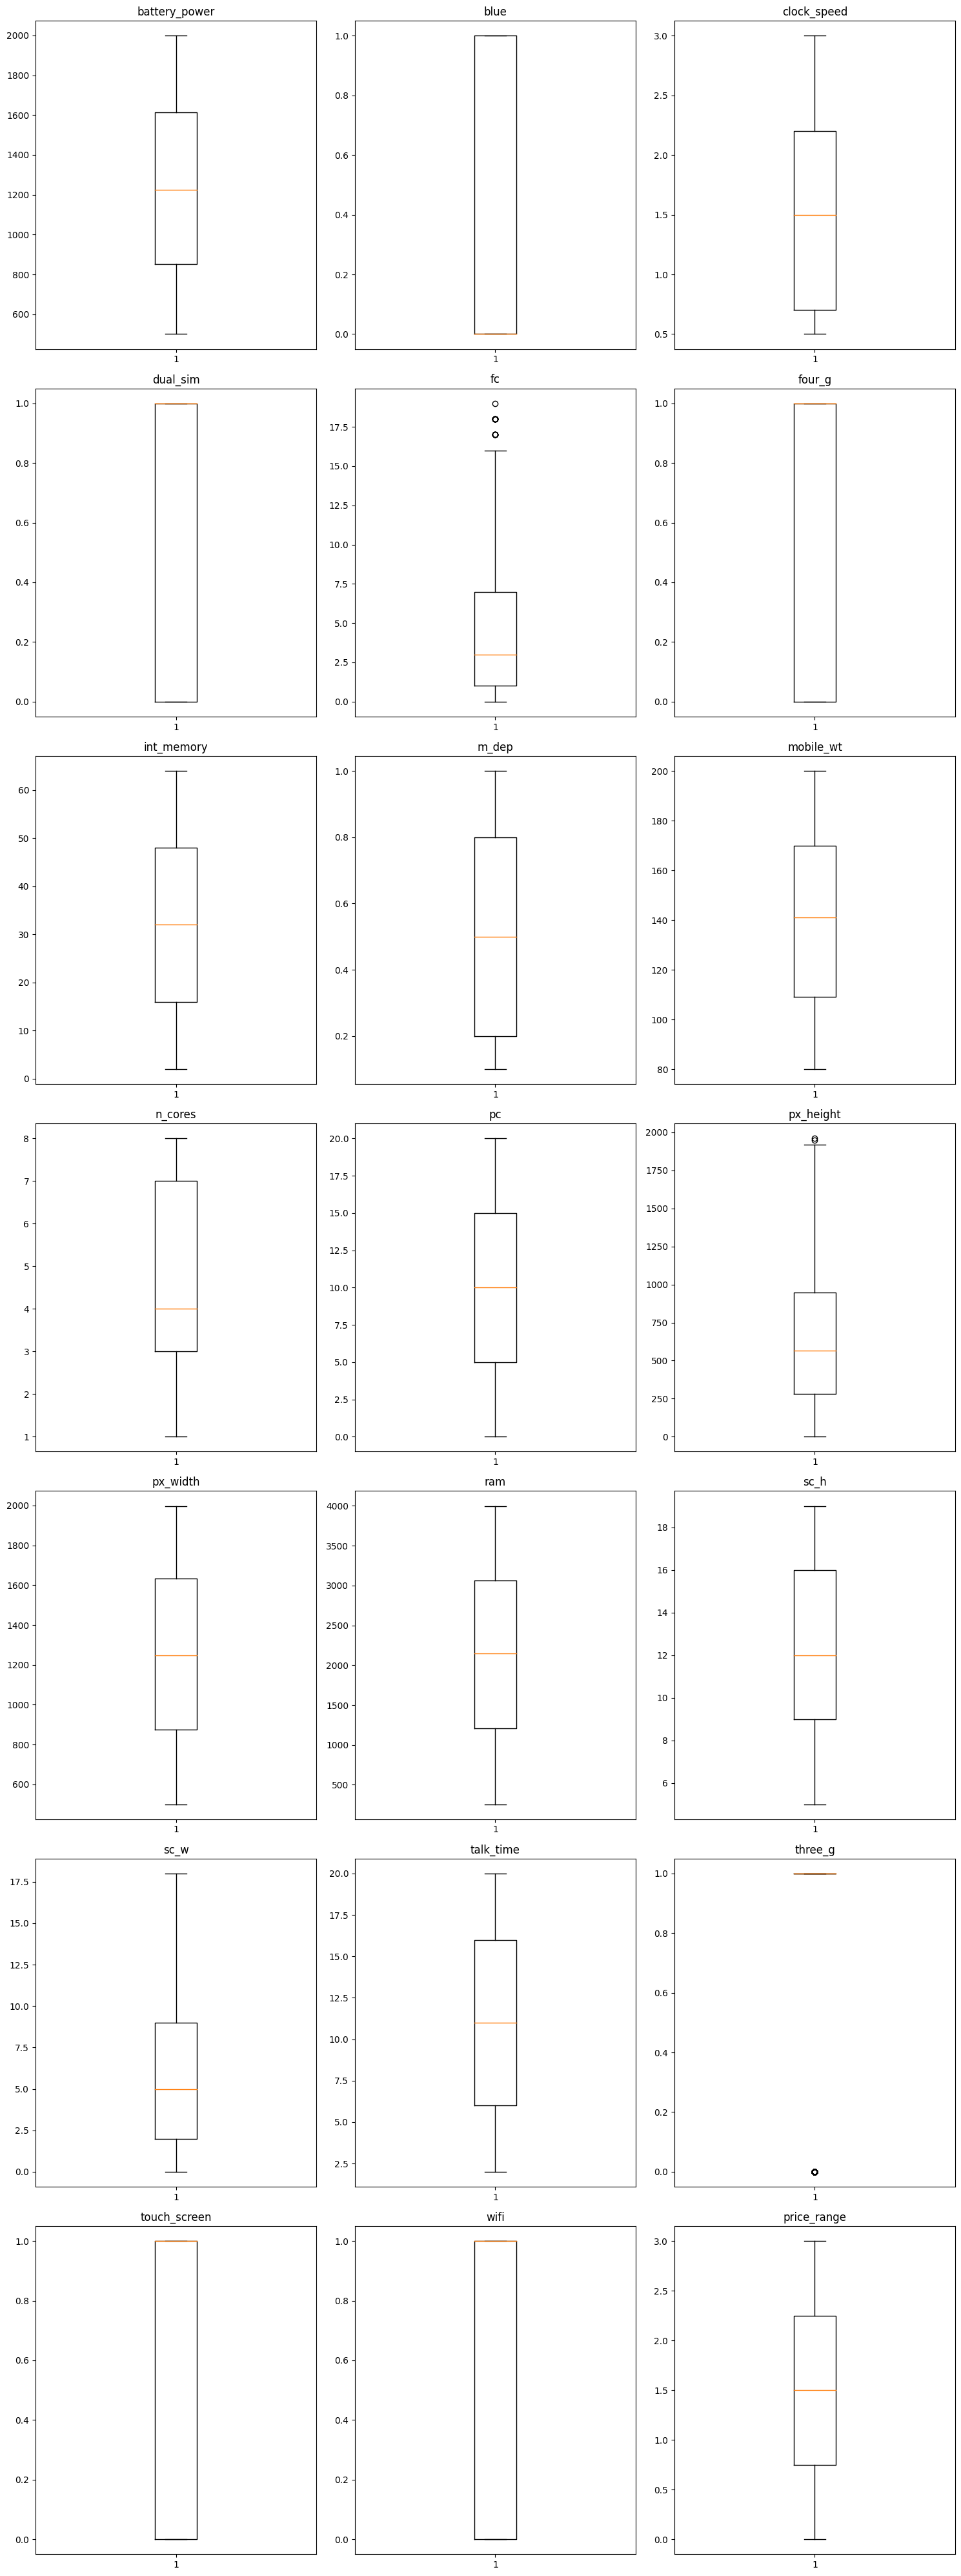

In [14]:
fig, axes = plt.subplots(7, 3, figsize=(15, 40))
axes = axes.ravel() 
for index, column in enumerate(data.columns):
    ax = axes[index]
    ax.boxplot(data[column])
    ax.set_title(column)
plt.tight_layout()
plt.show()

## **Estandarización de variables**

In [15]:
from sklearn.preprocessing import Normalizer
scale = Normalizer().fit_transform(data)
data_scale = pd.DataFrame(scale, columns=data.columns)
data_scale

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.301210,0.000000,0.000787,0.000000,0.000358,0.000000,0.002504,0.000215,0.067254,0.000715,...,0.007155,0.270445,0.911859,0.003220,0.002504,0.006797,0.000000,0.000000,0.000358,0.000358
1,0.285853,0.000280,0.000140,0.000280,0.000000,0.000280,0.014839,0.000196,0.038076,0.000840,...,0.253376,0.556588,0.736611,0.004760,0.000840,0.001960,0.000280,0.000280,0.000000,0.000560
2,0.164909,0.000293,0.000146,0.000293,0.000586,0.000293,0.012009,0.000264,0.042472,0.001465,...,0.369947,0.502636,0.762449,0.003222,0.000586,0.002636,0.000293,0.000293,0.000000,0.000586
3,0.172357,0.000280,0.000701,0.000000,0.000000,0.000000,0.002803,0.000224,0.036713,0.001682,...,0.340790,0.500536,0.776027,0.004484,0.002242,0.003083,0.000280,0.000000,0.000000,0.000561
4,0.633697,0.000348,0.000418,0.000000,0.004524,0.000348,0.015312,0.000209,0.049067,0.000696,...,0.420377,0.421769,0.491019,0.002784,0.000696,0.005220,0.000348,0.000348,0.000000,0.000348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.320066,0.000403,0.000202,0.000403,0.000000,0.000403,0.000806,0.000322,0.042729,0.002419,...,0.492595,0.761870,0.269275,0.005240,0.001612,0.007659,0.000403,0.000403,0.000000,0.000000
1996,0.550835,0.000280,0.000729,0.000280,0.000000,0.000000,0.010933,0.000056,0.052420,0.001121,...,0.256496,0.550835,0.569617,0.003084,0.002803,0.004485,0.000280,0.000280,0.000280,0.000561
1997,0.471497,0.000000,0.000222,0.000247,0.000247,0.000247,0.008882,0.000173,0.026647,0.001974,...,0.214160,0.402660,0.754248,0.002221,0.000247,0.001234,0.000247,0.000247,0.000000,0.000740
1998,0.793912,0.000000,0.000473,0.000000,0.002100,0.000525,0.024153,0.000053,0.076136,0.002625,...,0.176425,0.351799,0.456289,0.009451,0.005251,0.009976,0.000525,0.000525,0.000525,0.000000


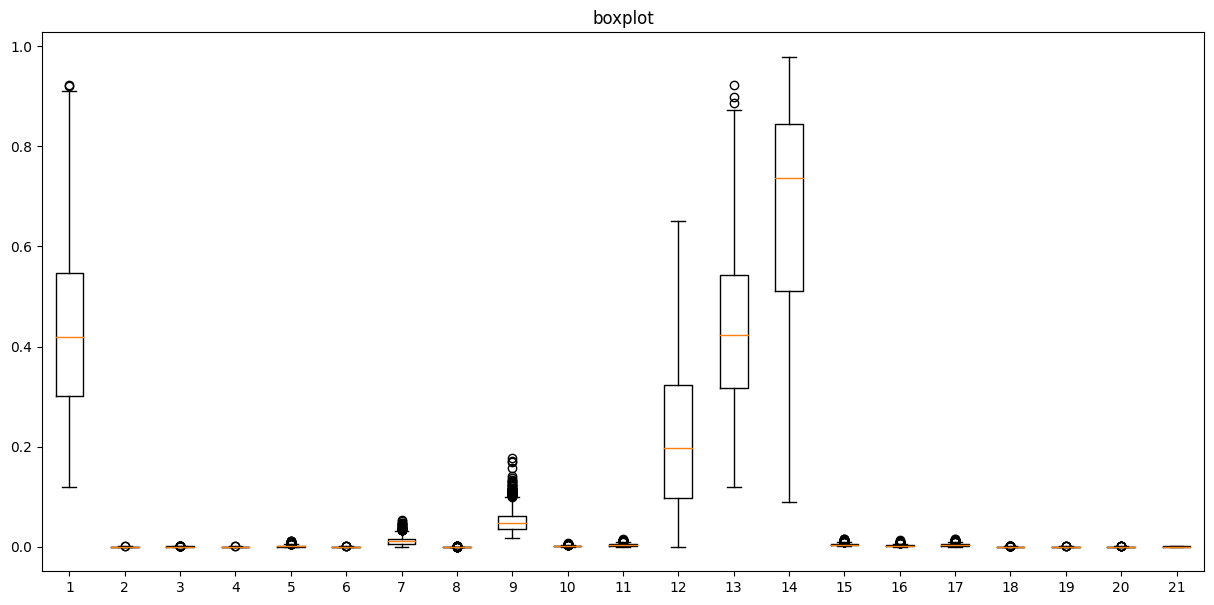

In [16]:
fig, axs = plt.subplots(figsize=(15,7))

axs.boxplot(data_scale)
axs.set_title('boxplot')
plt.show()

## **Matriz de correlación**

In [17]:
data_corr = data.corr(method='pearson')

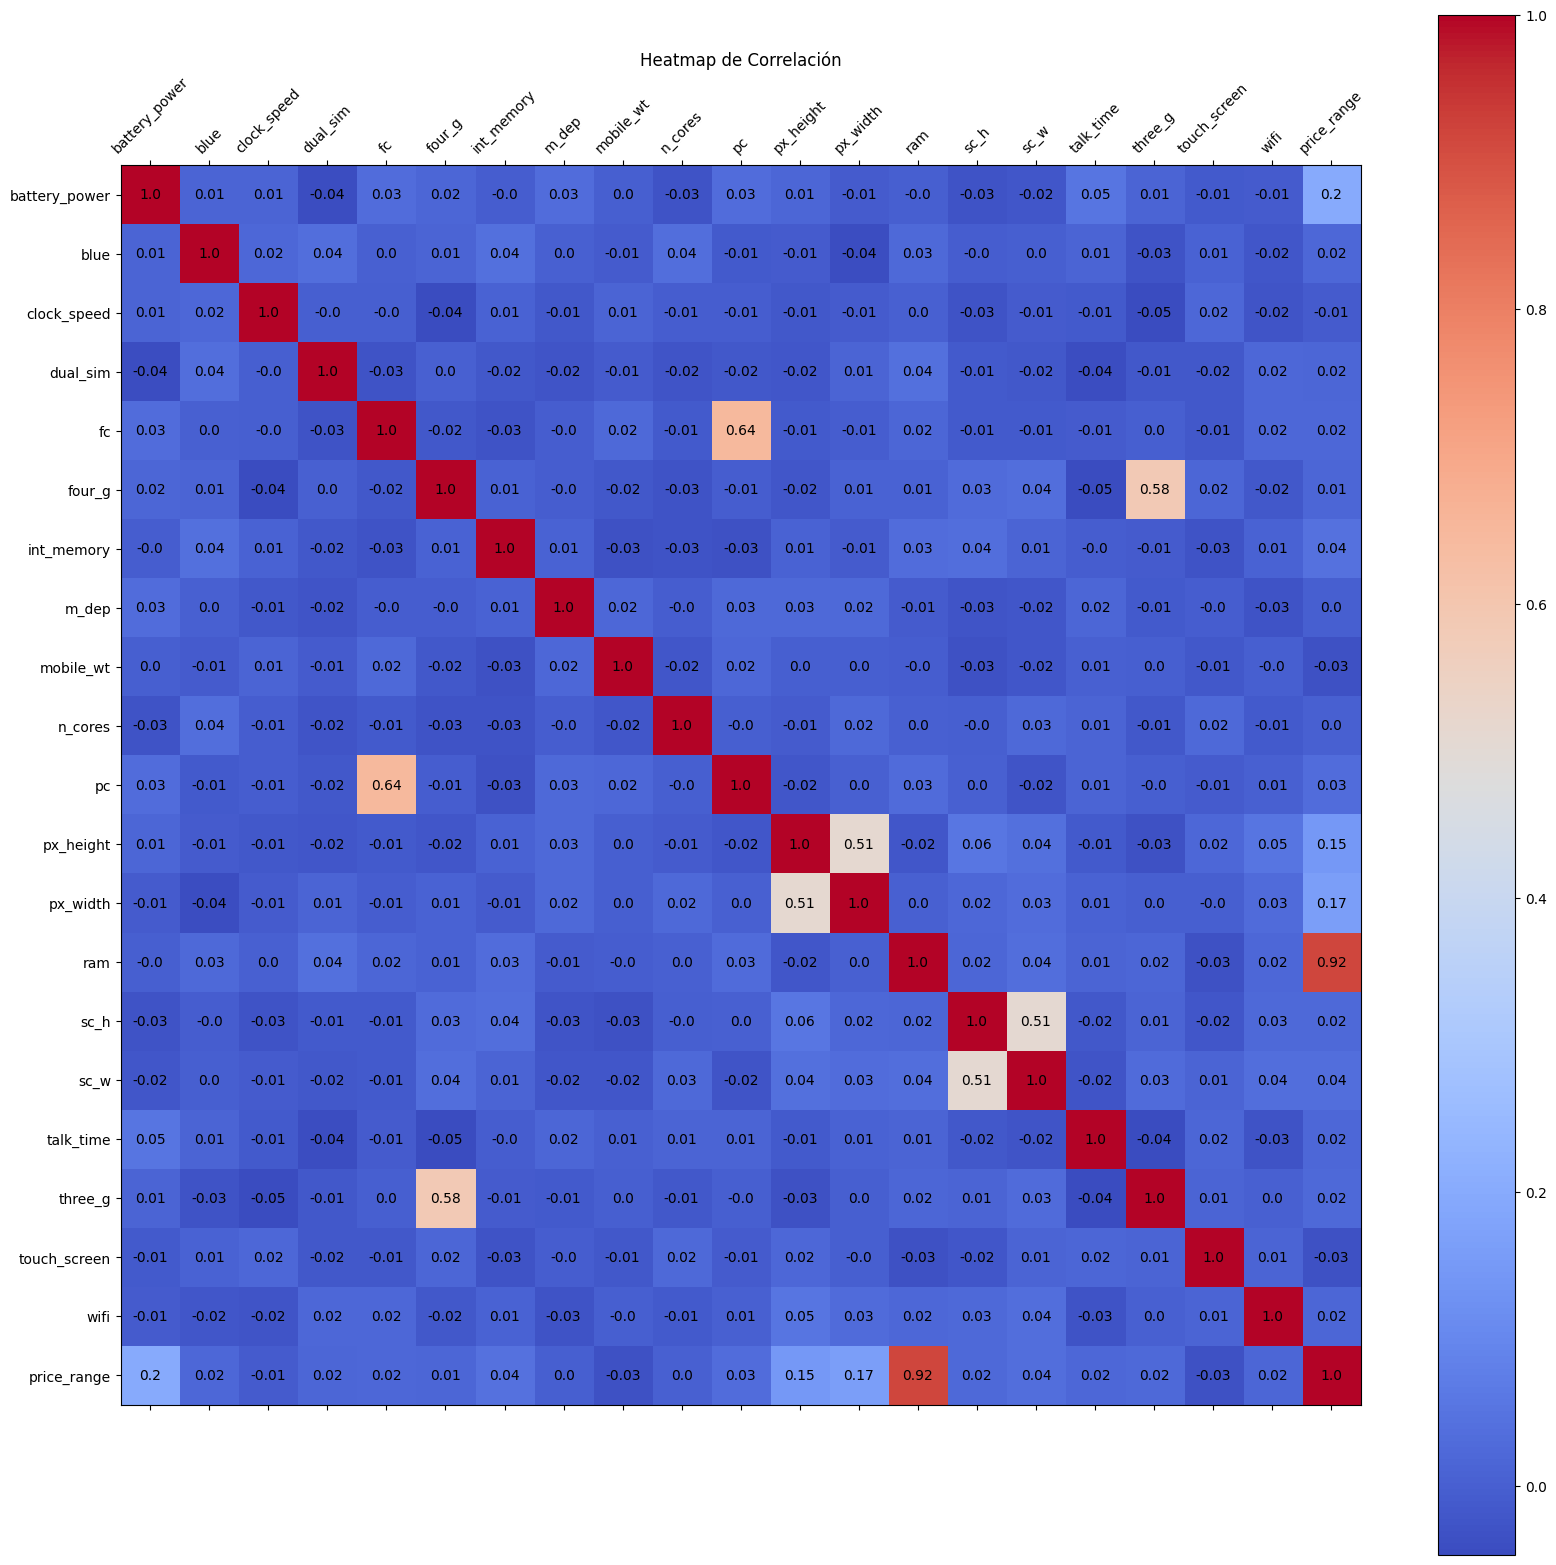

In [18]:
fig, ax = plt.subplots(figsize=(20, 20))
cax = ax.matshow(data_corr, cmap='coolwarm')
for i in range(data_corr.shape[0]):
    for j in range(data_corr.shape[1]):
        ax.text(j, i, round(data_corr.iloc[i, j], 2), ha='center', va='center')
ax.set_xticks(range(len(data_corr.columns)))
ax.set_yticks(range(len(data_corr.index)))
ax.set_xticklabels(data_corr.columns, rotation=45)
ax.set_yticklabels(data_corr.index)
ax.set_title('Heatmap de Correlación')
fig.colorbar(cax)
plt.show()

In [19]:
corr_price_range = data_corr['price_range']
corr_price_range = corr_price_range.drop('price_range')
high_vars = corr_price_range[corr_price_range > 0.1]
ordered_vars = high_vars.sort_values(ascending=False)
print(ordered_vars)

ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
Name: price_range, dtype: float64


## **Datos de entrenamiento y de prueba**

In [20]:
clean_data = data[["ram", "battery_power", "px_width", "px_height", "price_range"]]
y = data[["price_range"]]